In [1]:
#header
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import csv
import math

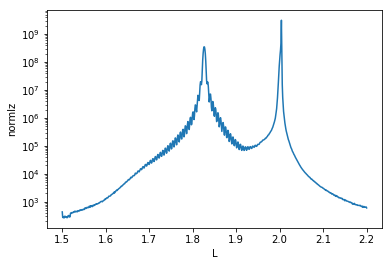

In [2]:
#get CSV
from numpy import genfromtxt
data = np.genfromtxt('Lscan1_BPBO002_STO002_scan1.csv', delimiter=',')
plt.plot(data[:,3],data[:,12]);
plt.yscale('log');
plt.xlabel('L');
plt.ylabel('normlz');


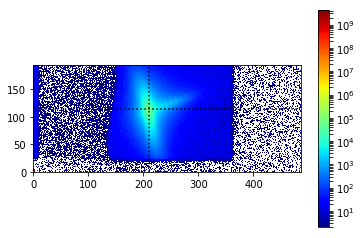

In [4]:
#OpenPilatusImage .raw
f1 = open("b_mehta_Lscan_114_scan1_0023.raw", "r")
raw = np.fromfile(f1, dtype=np.uint32)
img=raw.reshape(195,487)
f1.close()

img[0,0] = 0;
img[194,0] = 0;
img[0,486] = 0;
img[194,486] = 0;
#imgplot = plt.imshow(np.log10(img), cmap="jet",origin='lower');

imgplot = plt.imshow(img, cmap="jet",origin='lower',norm=colors.LogNorm(2,img.max()));

plt.colorbar();
db=[210,115];


plt.plot(db[0]*np.ones(194),np.arange(0,194),'k:')
plt.plot(np.arange(0,486),db[1]*np.ones(486),'k:')

In [1]:
#PDI_imp .raw.pdi
f2 = open("b_mehta_Lscan_114_scan1_0023.raw.pdi", "r")
PDI=f2.read() 
f2.close()
k1=PDI.find("Theta = ");
k2=PDI.find("Gamma");
m_angle=PDI[k1:k2-1];
m_angle=m_angle.replace('2Theta','TwoTheta')
exec(m_angle)

k1=PDI.find("LAMBDA = ");
k2=PDI.find("# Initial");
m_lambda=PDI[k1:k2-1];
print(Theta,TwoTheta,Chi,Phi,m_lambda)


26.1624 52.3834 109.243 45 LAMBDA = 0.885601


In [1]:
from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets
def f(x):
    
    plt.plot(data[:,3],x*data[:,3])
    plt.yscale('log');

    return x
#interact(f, x=11, min=5);
interact(f, x=widgets.IntSlider(min=0,max=20,step=1,value=10));


interactive(children=(IntSlider(value=10, description='x', max=20), Output()), _dom_classes=('widget-interact'…